# MODEL TRAINING AND LINEAR REGRESSION

# Linear Regression using gradient descent(manually)

## 1. Data(preparing and loading)

In [139]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [140]:
slope  = 3
inter = 2
# y = slope * x + intercept
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = X * slope + inter

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[2.0000],
         [2.0600],
         [2.1200],
         [2.1800],
         [2.2400],
         [2.3000],
         [2.3600],
         [2.4200],
         [2.4800],
         [2.5400]]))

### Splitting data into training and test sets

In [141]:
# Training set - 60%-80%
# Validation set - 10%-20%
# Testing set - 10%-20%

fac = int(0.8 * len(X))
X_train, y_train = X[:fac], y[:fac]
X_test, y_test = X[fac:], y[fac:]

len(X_train),len(X_test),len(y_train),len(y_train)

(40, 10, 40, 40)

In [142]:
def plot(train_data=X_train,
         train_labels=y_train,
         test_data=X_test,
         test_labels=y_test,
         predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14});


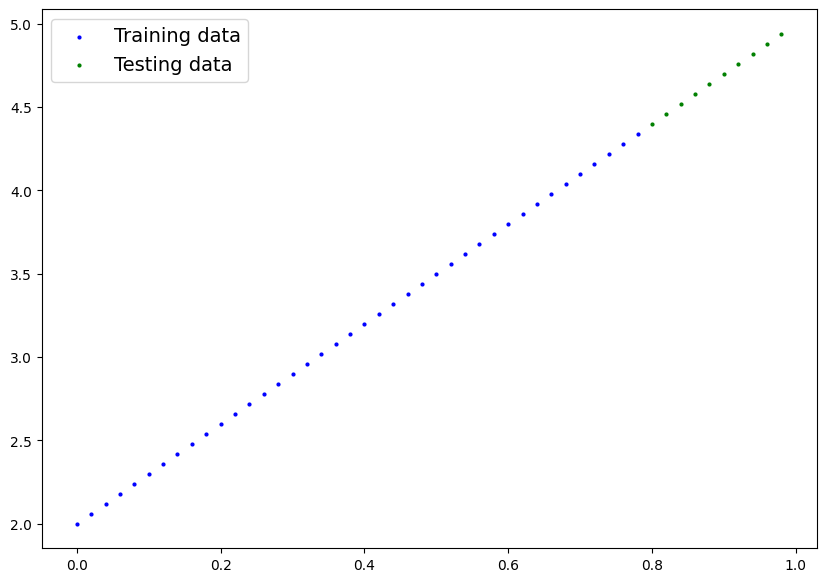

In [143]:
plot();

## 2. Build Model

In [144]:
import torch
from torch import nn
# making a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.slope = nn.Parameter(torch.randn(1,dtype=torch.float),
                                    requires_grad=True)
        self.inter = nn.Parameter(torch.randn(1,dtype=torch.float),
                                    requires_grad=True)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.slope * x + self.inter

In [145]:
torch.manual_seed(42)
model_1 = LinearRegressionModel()

list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [146]:
model_1.state_dict()

OrderedDict([('slope', tensor([0.3367])), ('inter', tensor([0.1288]))])

#### Making predictions


In [147]:
# use .inference_mode()
with torch.inference_mode():
    y_preds = model_1(X_test)

# older PyTorch used .no_grad()

In [148]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


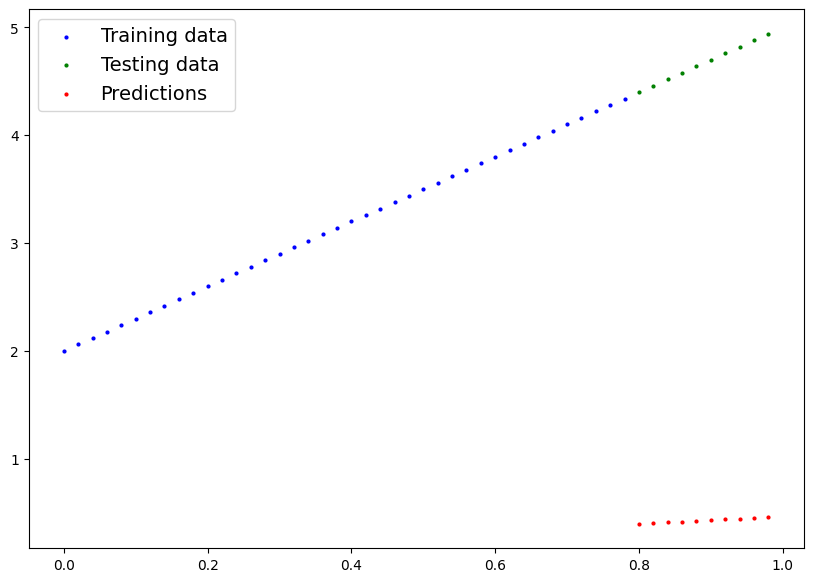

In [149]:
plot(predictions=y_preds)

In [150]:
y_test, y_preds

(tensor([[4.4000],
         [4.4600],
         [4.5200],
         [4.5800],
         [4.6400],
         [4.7000],
         [4.7600],
         [4.8200],
         [4.8800],
         [4.9400]]),
 tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]))

## 3. Train Model

### Creating loss function and optimizer

In [151]:
# loss function is difference between test and predicted values
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.001)
# lr -> learning rate

### Creating optimization loop

In [152]:
torch.manual_seed(42)

epochs = 12001

train_loss_values = []
test_loss_values = []
i_count = []

for i in range(epochs):
    # Put model in training made
    model_1.train()

    # 1. Forward Pass
    y_pred = model_1(X_train)

    # 2. Calculate loss function
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ## TESTING
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if i % 1000 == 0:
            i_count.append(i)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print("Epoch:",i,"Train Loss:",loss,"Tets Loss:",test_loss)



Epoch: 0 Train Loss: tensor(2.9099, grad_fn=<MeanBackward0>) Tets Loss: tensor(4.2402)
Epoch: 1000 Train Loss: tensor(1.7578, grad_fn=<MeanBackward0>) Tets Loss: tensor(2.8931)
Epoch: 2000 Train Loss: tensor(0.6308, grad_fn=<MeanBackward0>) Tets Loss: tensor(1.5596)
Epoch: 3000 Train Loss: tensor(0.3183, grad_fn=<MeanBackward0>) Tets Loss: tensor(0.8647)
Epoch: 4000 Train Loss: tensor(0.2717, grad_fn=<MeanBackward0>) Tets Loss: tensor(0.6602)
Epoch: 5000 Train Loss: tensor(0.2369, grad_fn=<MeanBackward0>) Tets Loss: tensor(0.5539)
Epoch: 6000 Train Loss: tensor(0.2025, grad_fn=<MeanBackward0>) Tets Loss: tensor(0.4736)
Epoch: 7000 Train Loss: tensor(0.1682, grad_fn=<MeanBackward0>) Tets Loss: tensor(0.3932)
Epoch: 8000 Train Loss: tensor(0.1339, grad_fn=<MeanBackward0>) Tets Loss: tensor(0.3129)
Epoch: 9000 Train Loss: tensor(0.0995, grad_fn=<MeanBackward0>) Tets Loss: tensor(0.2326)
Epoch: 10000 Train Loss: tensor(0.0652, grad_fn=<MeanBackward0>) Tets Loss: tensor(0.1523)
Epoch: 11000

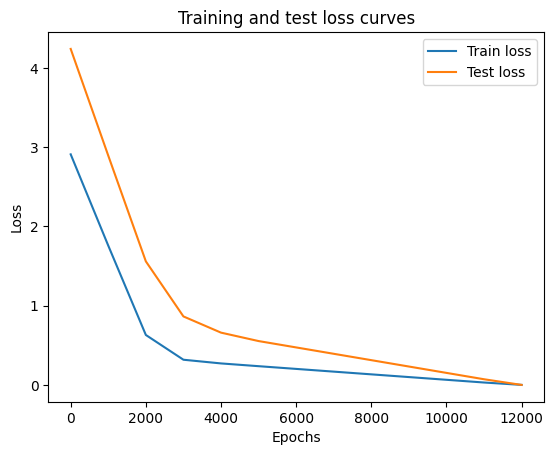

In [153]:
plt.plot(i_count, train_loss_values, label="Train loss")
plt.plot(i_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## 4. Making predictions

In [154]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[4.3996],
        [4.4596],
        [4.5196],
        [4.5796],
        [4.6396],
        [4.6995],
        [4.7595],
        [4.8195],
        [4.8795],
        [4.9395]])

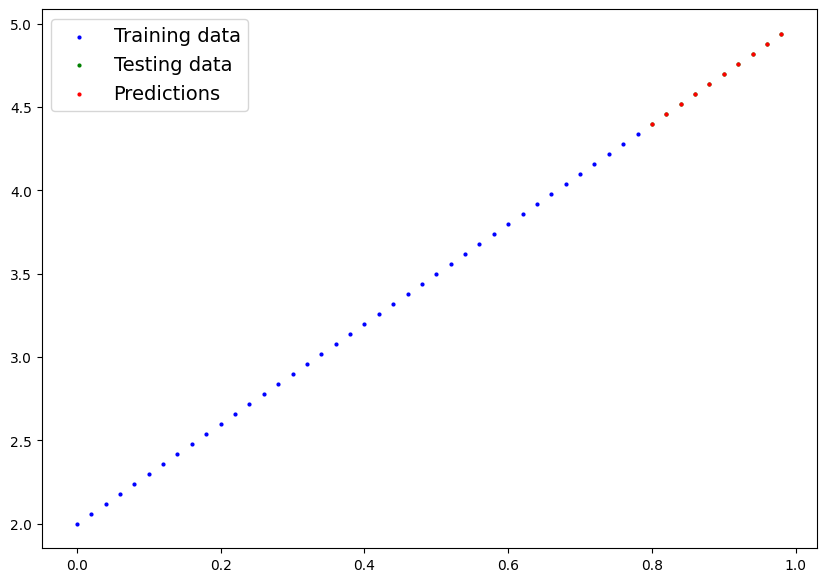

In [155]:
plot(predictions = y_preds)

## Saving and Loading a PyTorch Model

In [156]:
from pathlib import Path

# 1. Create model directory
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

# 2. Create nodel save path
model_anme = "01_Linear regression.pth"
model_save_path = model_path / model_anme

# 3. Save the model state dict
print(f"Saving model to:{model_save_path}")
torch.save(obj=model_1.state_dict(),
               f=model_save_path)

Saving model to:models/01_Linear regression.pth


In [157]:
!ls -l models/01_LinearRegression.pth

-rw-r--r-- 1 root root 1574 Mar  9 10:44 models/01_LinearRegression.pth


In [158]:
loaded_model_1 = LinearRegressionModel()

loaded_model_1.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [159]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_pred = loaded_model_1(X_test)
y_preds == loaded_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Linear Regression using inbuilt functions

In [160]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [161]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## Defining necessary terms

In [162]:
slope = 3
intercept = 2
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim = 1)
y = X * slope + intercept

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[2.0000],
         [2.0600],
         [2.1200],
         [2.1800],
         [2.2400],
         [2.3000],
         [2.3600],
         [2.4200],
         [2.4800],
         [2.5400]]))

In [163]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

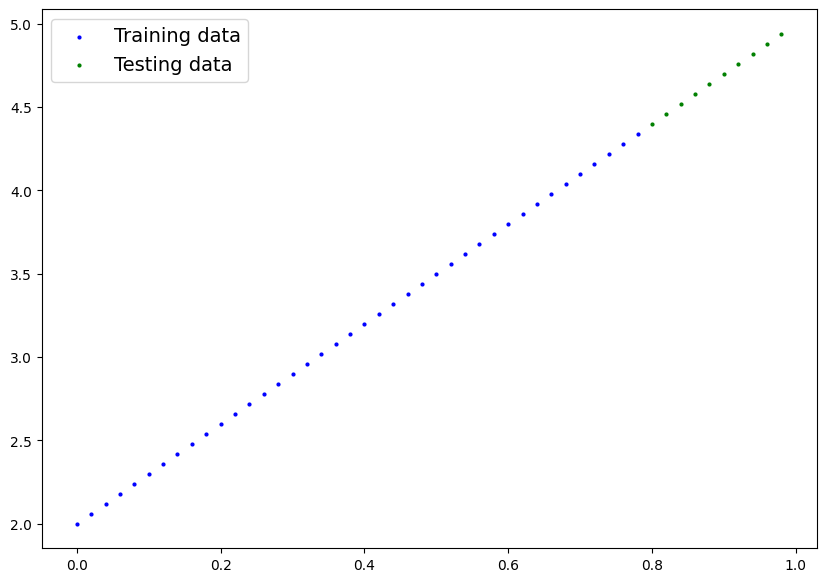

In [164]:
plot()

## Building A linear model

In [165]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# torch.manual_seed(42)
model_2 = LinearRegressionModelV2()
model_2, model_2.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.2191]])),
              ('linear_layer.bias', tensor([0.2018]))]))

In [166]:
model_2.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [167]:
next(model_2.parameters()).device

device(type='cuda', index=0)

## Training

In [168]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.01)

In [169]:
epochs = 12001

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_2.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_2(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_2.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_2(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 3.053659439086914 | Test loss: 4.649740695953369
Epoch: 1000 | Train loss: 0.16684500873088837 | Test loss: 0.38943347334861755
Epoch: 2000 | Train loss: 0.004596227314323187 | Test loss: 0.004469966981559992
Epoch: 3000 | Train loss: 0.004596227314323187 | Test loss: 0.004469966981559992
Epoch: 4000 | Train loss: 0.004596227314323187 | Test loss: 0.004469966981559992
Epoch: 5000 | Train loss: 0.004596227314323187 | Test loss: 0.004469966981559992
Epoch: 6000 | Train loss: 0.004596227314323187 | Test loss: 0.004469966981559992
Epoch: 7000 | Train loss: 0.004596227314323187 | Test loss: 0.004469966981559992
Epoch: 8000 | Train loss: 0.004596227314323187 | Test loss: 0.004469966981559992
Epoch: 9000 | Train loss: 0.004596227314323187 | Test loss: 0.004469966981559992
Epoch: 10000 | Train loss: 0.004596227314323187 | Test loss: 0.004469966981559992
Epoch: 11000 | Train loss: 0.004596227314323187 | Test loss: 0.004469966981559992
Epoch: 12000 | Train loss: 0.00459622

## Making predictions

In [170]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test)
y_preds

tensor([[4.4049],
        [4.4648],
        [4.5247],
        [4.5846],
        [4.6445],
        [4.7044],
        [4.7643],
        [4.8242],
        [4.8841],
        [4.9440]], device='cuda:0')

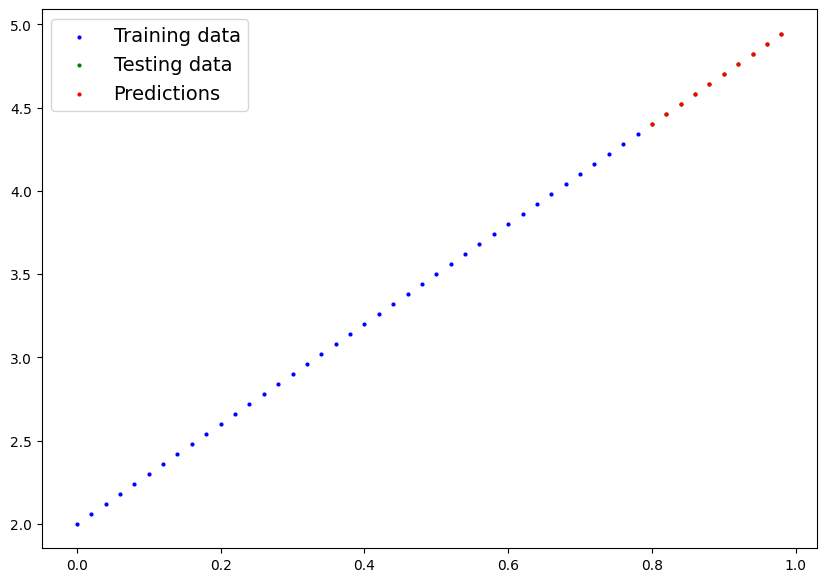

In [171]:
plot(predictions=y_preds.cpu())

## Saving Model

In [175]:
from pathlib import Path

# 1. Create model directory
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

# 2. Create nodel save path
model_anme = "02_LinearRegression.pth"
model_save_path = model_path / model_anme

# 3. Save the model state dict
print(f"Saving model to:{model_save_path}")
torch.save(obj=model_2.state_dict(),
               f=model_save_path)

Saving model to:models/02_LinearRegression.pth


In [176]:
loaded_model_2 = LinearRegressionModelV2()

# Load model state dict
loaded_model_2.load_state_dict(torch.load(model_save_path))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_2.to(device)

print(f"Loaded model:\n{loaded_model_2}")
print(f"Model on device:\n{next(loaded_model_2.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [177]:
loaded_model_2.eval()
with torch.inference_mode():
    loaded_model_2_preds = loaded_model_2(X_test)
y_preds == loaded_model_2_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# Exercises